[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Piphi5/Adopt-a-Pixel3km-Notebooks/blob/main/CEO%20Post%20Processing/PSU%20Analysis.ipynb)

# Setup

In [1]:
import os
import sys

import folium
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [2]:
files = ["aoi_grid_utils", "combine_csvs", "harmonization_utils", "plotting_utils"]

if "google.colab" in sys.modules or (
    "GITHUB_JOB" in os.environ and os.environ["GITHUB_JOB"] == "colab-test"
):
    for file in files:
        url = f"https://raw.githubusercontent.com/Piphi5/Adopt-a-Pixel3km-Notebooks/main/utils/code/{file}.py"
        exec(requests.get(url).text)
else:
    module_path = os.path.abspath(os.path.join("../utils/code"))
    sys.path.append(module_path)
    from aoi_grid_utils import *
    from combine_csvs import *
    from harmonization_utils import *
    from plotting_utils import *

## Specify Data Directory

`directory`: This directory should contain all CEO files from the different projects
`output_directory`: This will be the directory where the generated CSV files will be sent to

In [3]:
directory = "CEO AOI Data"
output_directory = "Sample PSU Output Data"

if not os.path.exists(output_directory):
    os.mkdir(output_directory)

# Preparing Data

## Combining Projects

This will combine all the different CEO projects into a single dataframe

In [4]:
df = get_csvs(directory)
df["email"] = df.groupby(["email"]).ngroup()
raw_df = df.copy()

In [5]:
df

,plot_id,center_lon,center_lat,size_m,shape,sample_points,email,flagged,flagged_reason,confidence,...,Land Cover Elements:cultivated vegetation,Land Cover Elements:Water>treated pool,Land Cover Elements:Water>lake/ponded/container,Land Cover Elements:Water>rivers/stream,Land Cover Elements:Water>irrigation ditch,Land Cover Elements:shadow,Land Cover Elements:unknown,Land Cover Elements:Bare Ground,Land Cover Elements:Building,Land Cover Elements:Impervious Surface (no building)
0,140877071,-89.568191,43.076827,square,100.0,100,51,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
1,140877072,-89.583581,43.088069,square,100.0,100,51,False,NaN,100.0,...,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,0.0,0.0
2,140877073,-89.577425,43.088069,square,100.0,100,25,False,NaN,85.0,...,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
3,140877074,-89.571269,43.088069,square,100.0,100,25,False,NaN,80.0,...,0.0,0.0,0.0,0.0,0.0,9.0,3.0,33.0,0.0,0.0
4,140877075,-89.565113,43.088069,square,100.0,100,25,False,NaN,87.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,93.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,141016483,-84.305123,33.924089,square,100.0,100,-1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
440,141016484,-84.299703,33.924089,square,100.0,100,-1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
441,141016485,-84.294283,33.924089,square,100.0,100,-1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
442,141016486,-84.288863,33.924089,square,100.0,100,-1,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Calculating AOI Numbers

In [6]:
df["AOI Number"] = np.floor(df["pl_plotid"] / 100)

## Removing Null Entries

In [7]:
df = df[df["confidence"].notna()]

In [8]:
df

,plot_id,center_lon,center_lat,size_m,shape,sample_points,email,flagged,flagged_reason,confidence,...,Land Cover Elements:Water>treated pool,Land Cover Elements:Water>lake/ponded/container,Land Cover Elements:Water>rivers/stream,Land Cover Elements:Water>irrigation ditch,Land Cover Elements:shadow,Land Cover Elements:unknown,Land Cover Elements:Bare Ground,Land Cover Elements:Building,Land Cover Elements:Impervious Surface (no building),AOI Number
0,140877071,-89.568191,43.076827,square,100.0,100,51,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
1,140877072,-89.583581,43.088069,square,100.0,100,51,False,NaN,100.0,...,0.0,0.0,10.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
2,140877073,-89.577425,43.088069,square,100.0,100,25,False,NaN,85.0,...,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
3,140877074,-89.571269,43.088069,square,100.0,100,25,False,NaN,80.0,...,0.0,0.0,0.0,0.0,9.0,3.0,33.0,0.0,0.0,0.0
4,140877075,-89.565113,43.088069,square,100.0,100,25,False,NaN,87.0,...,0.0,0.0,0.0,0.0,3.0,0.0,93.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,141016372,-77.422324,38.898394,square,100.0,100,35,False,NaN,85.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,23.0,24.0,97.0
329,141016373,-77.416545,38.898394,square,100.0,100,35,False,NaN,75.0,...,0.0,0.0,0.0,0.0,7.0,4.0,2.0,13.0,32.0,97.0
330,141016374,-77.410767,38.898394,square,100.0,100,35,False,NaN,95.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,97.0
331,141016375,-77.404988,38.898394,square,100.0,100,35,False,NaN,50.0,...,0.0,0.0,0.0,0.0,5.0,3.0,3.0,7.0,12.0,97.0


## Removing Duplicate Entries

In [9]:
df = df.sort_values("confidence", ascending=False).drop_duplicates(
    ["center_lon", "center_lat"]
)

In [10]:
df

,plot_id,center_lon,center_lat,size_m,shape,sample_points,email,flagged,flagged_reason,confidence,...,Land Cover Elements:Water>treated pool,Land Cover Elements:Water>lake/ponded/container,Land Cover Elements:Water>rivers/stream,Land Cover Elements:Water>irrigation ditch,Land Cover Elements:shadow,Land Cover Elements:unknown,Land Cover Elements:Bare Ground,Land Cover Elements:Building,Land Cover Elements:Impervious Surface (no building),AOI Number
0,140877071,-89.568191,43.076827,square,100.0,100,51,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2058,140879129,-96.732731,33.127087,square,100.0,100,3,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,66.0,55.0
2056,140879127,-96.743470,33.127087,square,100.0,100,3,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,31.0,55.0
2055,140879126,-96.748839,33.127087,square,100.0,100,3,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,34.0,55.0
2054,140879125,-96.754209,33.127087,square,100.0,100,3,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,33.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,140963199,-106.233694,31.717792,square,100.0,100,31,False,NaN,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,57.0,41.0,0.0,76.0
734,140963229,-106.233694,31.695308,square,100.0,100,31,False,NaN,15.0,...,0.0,0.0,0.0,16.0,18.0,0.0,16.0,30.0,20.0,76.0
716,140963211,-106.233694,31.708798,square,100.0,100,31,False,NaN,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,56.0,76.0
719,140963214,-106.217837,31.708798,square,100.0,100,31,False,NaN,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.0,36.0,16.0,76.0


## Identifying Almost Complete AOI Plots

Set the `almost_threshold` variable to the threshold for marking an "almost complete" AOI

In [11]:
almost_threshold = 36

In [12]:
almost_complete = df.groupby("AOI Number").filter(lambda x: len(x) == almost_threshold)
almost_complete

,plot_id,center_lon,center_lat,size_m,shape,sample_points,email,flagged,flagged_reason,confidence,...,Land Cover Elements:Water>treated pool,Land Cover Elements:Water>lake/ponded/container,Land Cover Elements:Water>rivers/stream,Land Cover Elements:Water>irrigation ditch,Land Cover Elements:shadow,Land Cover Elements:unknown,Land Cover Elements:Bare Ground,Land Cover Elements:Building,Land Cover Elements:Impervious Surface (no building),AOI Number
122,141073910,-102.525329,32.321547,square,100.0,100,32,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,36.0,104.0
121,141073909,-102.530650,32.321547,square,100.0,100,32,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,34.0,7.0,37.0,104.0
120,141073908,-102.535970,32.321547,square,100.0,100,32,False,NaN,100.0,...,0.0,3.0,0.0,0.0,0.0,1.0,30.0,4.0,12.0,104.0
119,141073907,-102.541291,32.321547,square,100.0,100,32,False,NaN,100.0,...,0.0,0.0,0.0,0.0,8.0,1.0,43.0,15.0,11.0,104.0
118,141073906,-102.546612,32.321547,square,100.0,100,32,False,NaN,100.0,...,0.0,0.0,0.0,0.0,5.0,0.0,59.0,9.0,24.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,140878152,-76.043162,43.349094,square,100.0,100,49,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1080,140878151,-76.049345,43.349094,square,100.0,100,49,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1079,140878150,-76.018431,43.353591,square,100.0,100,49,False,NaN,100.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
1078,140878149,-76.024614,43.353591,square,100.0,100,49,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0


In [13]:
missing_plots = pd.Series()
for num, data in almost_complete.groupby("AOI Number"):
    data["plot num"] = data["pl_plotid"] % 100
    ideal_plot_nums = np.arange(0, 37)
    mask = np.isin(ideal_plot_nums, data["plot num"])
    aoi_missing = ideal_plot_nums[~mask] + 100 * num
    missing_plots = missing_plots.append(pd.Series(aoi_missing))
    print(f"AOI: {num} is missing plots: {aoi_missing}")

AOI: 4.0 is missing plots: [412.]
AOI: 29.0 is missing plots: [2903.]
AOI: 104.0 is missing plots: [10400.]


C:\Users\piphi\anaconda3\envs\py3k\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [14]:
missing_plots

0      412.0
0     2903.0
0    10400.0
dtype: float64

## Identifying Completed Plots

In [15]:
full_aoi = df.groupby("AOI Number").filter(lambda x: len(x) == 37)

full_aoi

,plot_id,center_lon,center_lat,size_m,shape,sample_points,email,flagged,flagged_reason,confidence,...,Land Cover Elements:Water>treated pool,Land Cover Elements:Water>lake/ponded/container,Land Cover Elements:Water>rivers/stream,Land Cover Elements:Water>irrigation ditch,Land Cover Elements:shadow,Land Cover Elements:unknown,Land Cover Elements:Bare Ground,Land Cover Elements:Building,Land Cover Elements:Impervious Surface (no building),AOI Number
0,140877071,-89.568191,43.076827,square,100.0,100,51,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0
2058,140879129,-96.732731,33.127087,square,100.0,100,3,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,66.0,55.0
2056,140879127,-96.743470,33.127087,square,100.0,100,3,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,31.0,55.0
2055,140879126,-96.748839,33.127087,square,100.0,100,3,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,34.0,55.0
2054,140879125,-96.754209,33.127087,square,100.0,100,3,False,NaN,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.0,33.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,140963199,-106.233694,31.717792,square,100.0,100,31,False,NaN,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,57.0,41.0,0.0,76.0
734,140963229,-106.233694,31.695308,square,100.0,100,31,False,NaN,15.0,...,0.0,0.0,0.0,16.0,18.0,0.0,16.0,30.0,20.0,76.0
716,140963211,-106.233694,31.708798,square,100.0,100,31,False,NaN,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,56.0,76.0
719,140963214,-106.217837,31.708798,square,100.0,100,31,False,NaN,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.0,36.0,16.0,76.0


# Summarizing Total Data

## Completion Data

### Totally Completed Percentage

In [16]:
len(full_aoi) / len(raw_df)

0.47368421052631576

### Almost Completed and Totally Completed Percentage

In [17]:
(len(full_aoi) + len(almost_complete)) / len(raw_df)

0.4992887624466572

## Visualization

In [18]:
df_legend = [[key, value] for key, value in ceo_legend.items()]
pd.DataFrame(df_legend, columns=["LC_Type", "HexCode"]).to_csv(
    f"{output_directory}/Legend.csv"
)

### AOI Summary

In [19]:
def graph_all_percentages(data, patches, plt):
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(patches):
        ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        plt.annotate(
            f"{round(data[i],2)}%",
            xy=(x, y),
            xytext=(1.35 * np.sign(x), 1.4 * y),
            horizontalalignment=horizontalalignment,
            **kw,
        )


def graph_max(max_percentage, value):
    if round(value, 2) != round(max_percentage, 2):
        return ""
    else:
        return f"{round(value,2)}%"


def summarize_aoi(aoi, all_percentages=False):
    classifications = [col for col in aoi.columns if "Land Cover Elements" in col]
    labels = [label.replace("Land Cover Elements:", "") for label in classifications]
    pie_colors = [ceo_legend[label] for label in labels]
    mean = np.mean(aoi[classifications])
    median = np.median(aoi[classifications], axis=0)
    minimum = np.min(aoi[classifications])
    maximum = np.max(aoi[classifications])

    plt.figure(figsize=(10, 15))
    plt.barh(labels, mean, label="Mean")
    plt.barh(labels, median, label="Median")
    plt.title("Mean and Median Distribution")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 15))
    plt.barh(labels, minimum, label="Minimum")
    plt.barh(labels, maximum, label="Maximum")
    plt.title("Min and Max Distribution")
    plt.legend()
    plt.show()
    plt.figure(figsize=(15, 15))

    max_value = max(mean.values)
    total = sum(mean.values)

    if not all_percentages:
        max_percentage = max_value / total * 100
        patches, text, autotext = plt.pie(
            mean,
            colors=pie_colors,
            explode=(mean.values == max_value) * 0.1,
            autopct=lambda value: graph_max(max_percentage, value),
            textprops=dict(color="w", fontsize=36),
        )
    else:
        patches, text = plt.pie(
            mean, colors=pie_colors, explode=(mean.values == max_value) * 0.1
        )
        graph_all_percentages((mean.values / total * 100), patches, plt)

    plt.legend(patches, labels, bbox_to_anchor=(1.15, 1), loc="upper left")
    plt.title("Mean Composition")
    plt.show()

In [20]:
show_all_percentages = False

### All Completed AOI Summaries

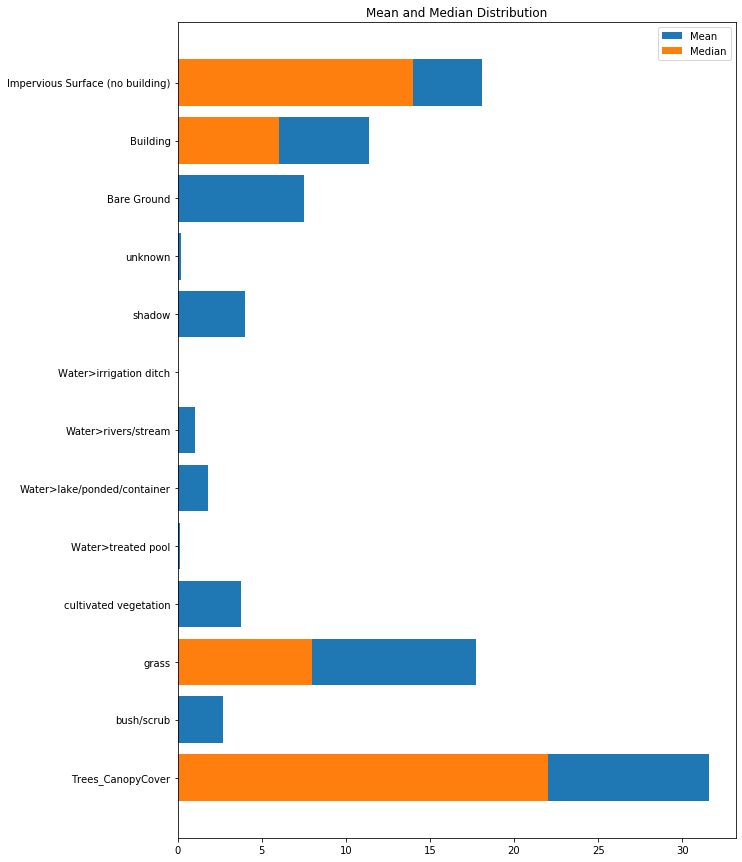

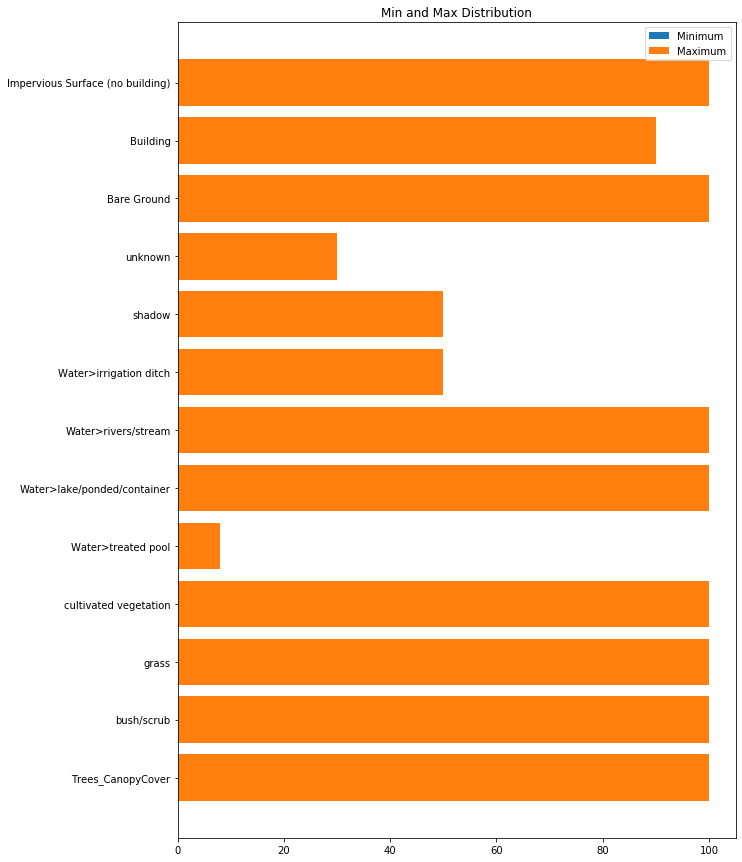

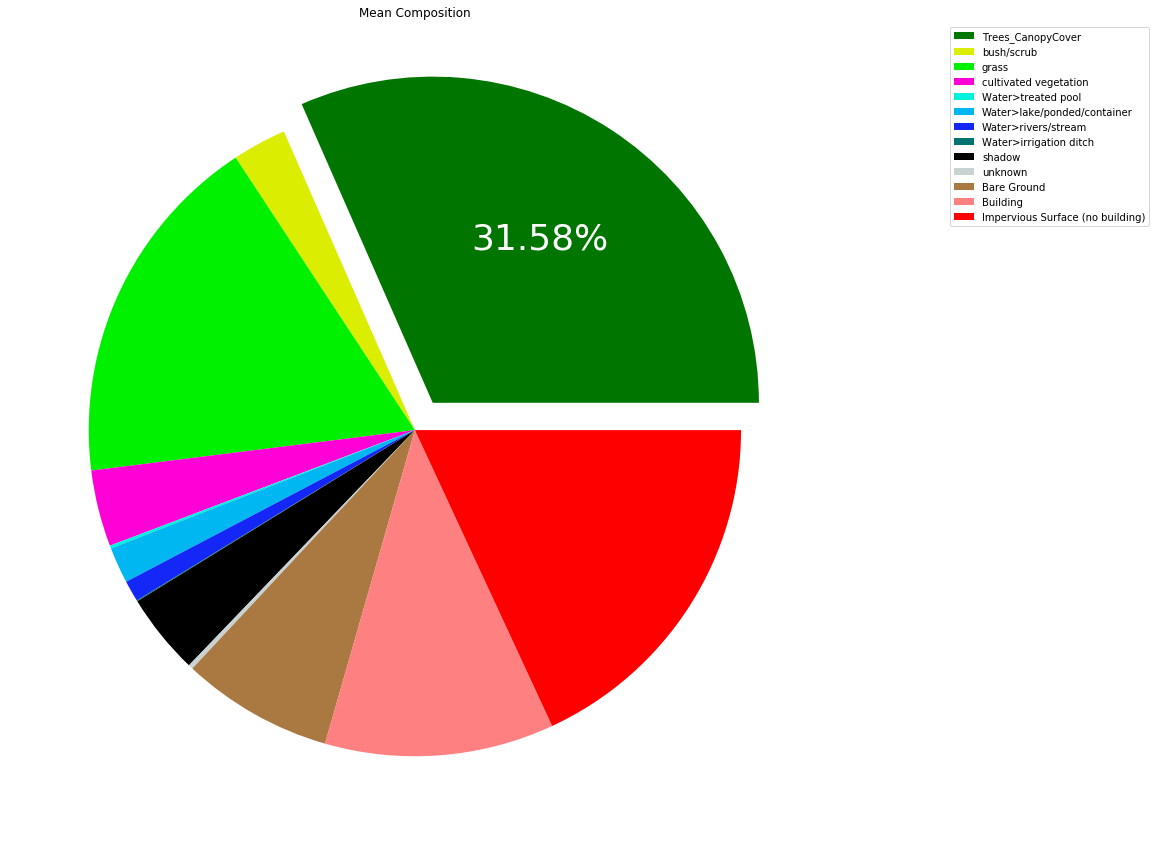

In [21]:
summarize_aoi(full_aoi, show_all_percentages)

### Individual AOI Summaries

#### Valid AOI Numbers

In [22]:
pd.unique(full_aoi["AOI Number"])

array([  0.,  55.,  54.,  33.,  56.,  53.,  52.,  48., 108., 110., 107.,
        37.,  38.,  39.,  34.,  44.,  45.,  46.,  41.,  83.,  85.,  86.,
        80.,  79.,  93.,  96.,  97.,  92.,  62.,  63.,  70.,  68., 113.,
        77.,  78.,  72.,  76.,  23.,  12.,  24.,  13.,  10.,  25.,   6.,
        11.,  22.,  16.,  15.,  20.,  19.,  30.,  31.,  32.,  27.])

#### Select AOI Number

In [23]:
aoi_number = 0

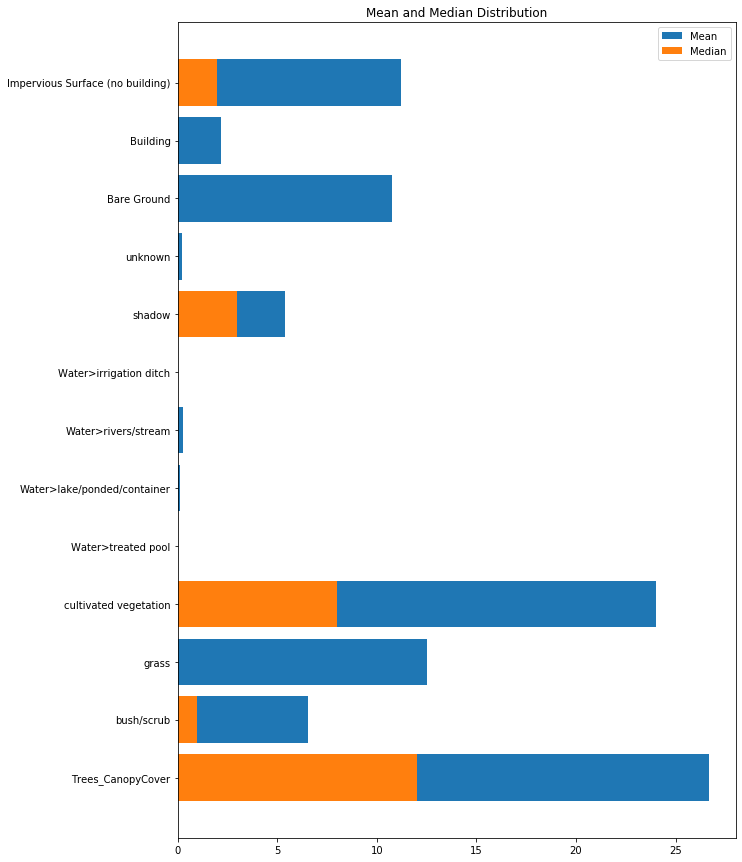

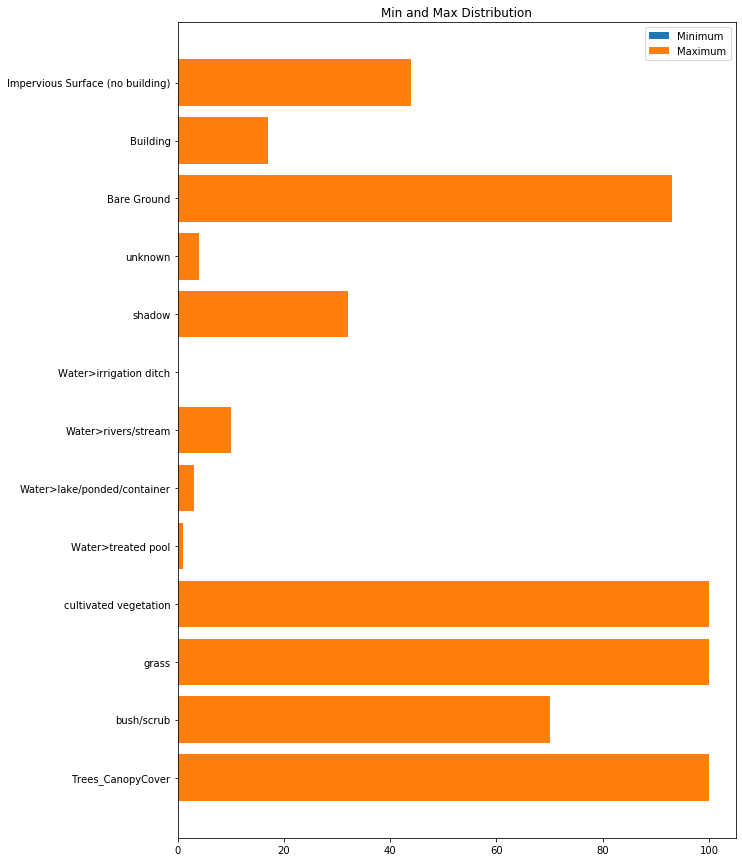

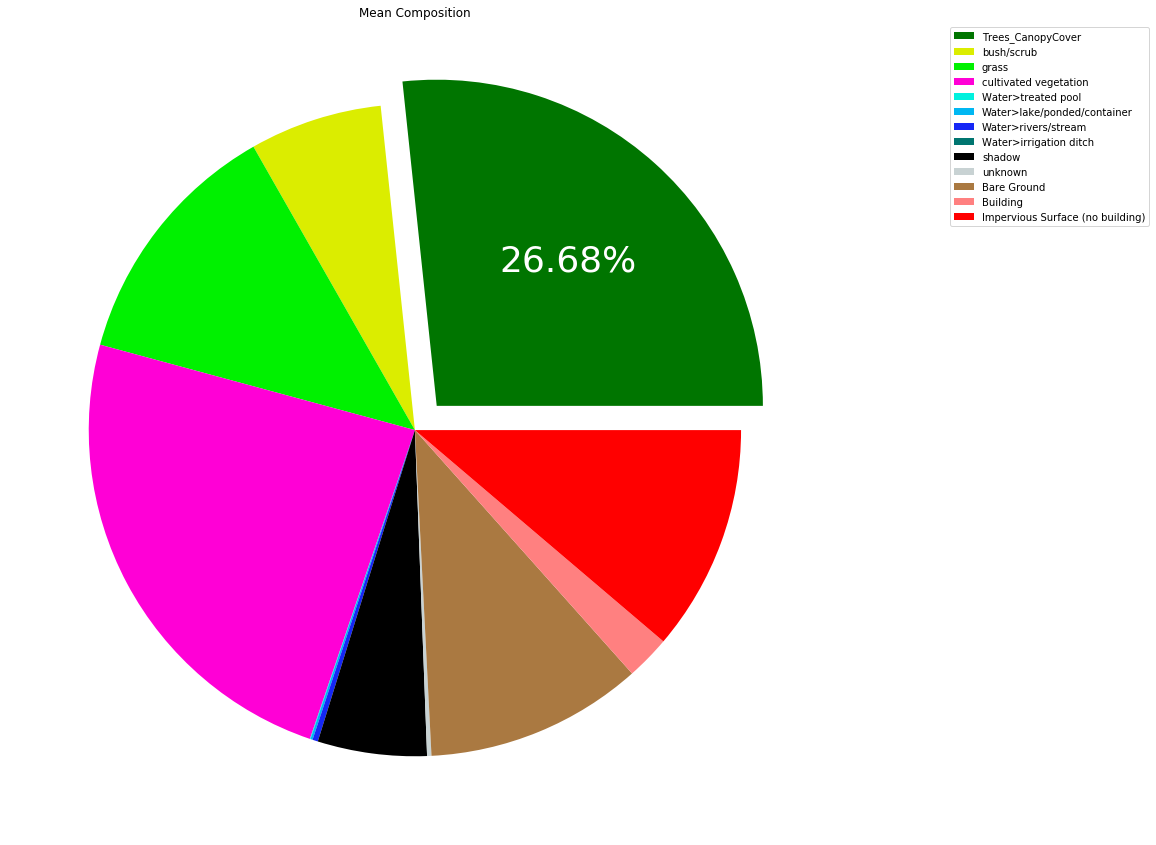

In [24]:
aoi_mask = full_aoi["AOI Number"] == aoi_number
aoi_df = full_aoi[aoi_mask]
summarize_aoi(aoi_df, show_all_percentages)

## Map Vizualization

In [25]:
center_point = (aoi_mask) & (full_aoi["pl_plotid"] % 100 == 0)
center_coords = full_aoi[center_point][["center_lat", "center_lon"]].squeeze().tolist()

# Constants to create square buffers
latitude_const, longitude_const = get_latlon_spacing_constants(50, center_coords[0])

# Define a map centered on AOI.
m = folium.Map(location=center_coords, zoom_start=15)

for _, row in aoi_df.iterrows():
    classifications = [col for col in aoi_df.columns if "Land Cover Elements" in col]
    coords = row[["center_lat", "center_lon"]].tolist()
    index = row[classifications].astype("float64").argmax()

    color = ceo_legend[classifications[index].replace("Land Cover Elements:", "")]
    bounds = [
        [coords[0] - latitude_const, coords[1] - longitude_const],
        [coords[0] + latitude_const, coords[1] + longitude_const],
    ]
    folium.Rectangle(
        bounds=bounds, fill=True, color=color, fill_color=color, fill_opacity=0.5
    ).add_to(m)

In [26]:
m

# Download

## Download All Completed AOI's

In [27]:
full_aoi.to_csv(f"{output_directory}/PSU Data.csv")

## Download Previously Selected Individual AOI

In [28]:
full_aoi[full_aoi["AOI Number"] == aoi_number].to_csv(
    f"{output_directory}/PSU-{aoi_number}.csv"
)

## Download List of almost complete AOIs

In [29]:
missing_plots.to_csv(f"{output_directory}/Missing PlotIDs.csv")